# Andrew Badzioch
## Final: Profit Margins

### Introduction

- <code>Case Scenario:</code> Smart Electronics Store – Maximizing Profit Margins

- <code>Background:</code> Smart Electronics Store (SES) is a retailer that has rapidly expanded to become a significant player in the electronics market, selling a variety of gadgets and accessories both online and in brick-and-mortar stores. Their product range includes smartphones, charging cables, headphones, monitors, and more niche items like smartwatches and gaming accessories.

- <code>Challenge:</code> SES operates in a highly competitive market where customer preferences and technology trends shift rapidly. The leadership team wants to ensure the company's growth remains robust by maximizing profit margins across its diverse product lines. They seek to understand which products yield the highest profit margins and how they can predict these margins to strategize effectively.

- <code>Data at Hand:</code> SES has collected detailed sales data that includes the cost price, selling price, and quantities sold for their inventory. This dataset is a valuable asset that can be leveraged to predict future profit margins.

- <code>Importance of Margin Prediction:</code>
    1.	**Strategic Stocking:** Predicting profit margins will allow SES to prioritize products that offer the best return on investment in terms of shelf space and inventory holdings.
    2.	**Dynamic Pricing:** By understanding projected margins, SES can apply dynamic pricing strategies, adjusting prices in real time based on demand, competition, and expected profitability.
    3.	**Tailored Promotions:** Products with substantial predicted margins are bundled or promoted to enhance sales volume while maintaining profitability.
    4.	**Supplier Negotiations:** With clear insights into which products are likely to be more profitable, SES can negotiate better terms with suppliers or seek cost-effective alternatives.
    5.	**Cost Management:** Margin prediction can help identify less profitable products, prompting a review of associated costs or a strategic decision to phase out specific items.
    6.	**Budget Allocation:** Accurate margin forecasts are crucial for financial planning, determining where to allocate marketing dollars, and making decisions on product development.

- <code>Proposed Solution:</code> To address the challenge, SES plans to use its sales data to build predictive models. By applying algorithms that can handle the variety and complexity of the data, such as Lasso Regression and Support Vector Machines (SVM), SES can predict future profit margins with greater accuracy.

- <code>Lasso Regression vs. SVM:</code>
    - **Lasso Regression:** This method is suitable for scenarios where we need to reduce the complexity of a model by performing feature selection. Lasso can identify which product features are most influential on profit margins by penalizing less significant variables to zero.
    - **Support Vector Machines (SVM):** SVM is effective when the relationship between product features and profit margins is not linear or straightforward. Using kernel functions like the radial basis function (RBF), SVM can model complex, non-linear relationships in the data.

- <code>Conclusion:</code> By effectively predicting profit margins, SES can make data-driven decisions to streamline their operations, focus on the most profitable products, and adapt their business strategy to the ever-changing market dynamics. This forward-looking approach is essential for maintaining a competitive edge in the technology retail space.
Profit margin, also known as net margin, is a financial metric used to assess a company's profitability. It is the percentage of revenue that exceeds the cost of goods sold (COGS), and it is a clear indicator of a company's financial health and efficiency. Essentially, profit margin measures how much of every dollar of sales a company actually keeps in earnings.

- A higher profit margin indicates a more profitable company that has better control over its costs compared to its competitors. Profit margins can vary by industry, and a 'good' margin will often depend on the norms within the particular sector of operation.
- The profit margin for each product can be calculated using the 'Price Each' and 'Cost price' columns from the sales_data.csv file. The 'Price Each' column indicates the selling price of the product, while the 'Cost price' column shows the cost of the product to the business. The difference between these two gives you the gross profit for each product.

- <code>Data Discription:</code>
    - Order Date: The date and time when the order was placed. Data Type: String (should ideally be datetime).
    - Order ID: A unique identifier for the order. Data Type: Integer.
    - Product: The name of the product ordered. Data Type: String.
    - Product_ean: The European Article Number (EAN), which is a barcode standard, a 12- or 13-digit product identification code. Data Type: String (should be numeric or string due to leading zeroes).
    - catégorie: The French word for 'category,' this column likely represents the category of the product. Data Type: String.
    - Purchase Address: The address where the product was delivered. Data Type: String.
    - Quantity Ordered: The number of units of the product ordered. Data Type: Integer.
    - Price Each: The price of one unit of the product. Data Type: Float.
    - Cost price: The cost to the company of one unit of the product. Data Type: Float.
    - Turnover: This is likely the total revenue from this order line (Quantity Ordered * Price Each). Data Type: Float.
    - Margin: The profit margin per product could be the absolute margin (Price Each - Cost price) or a percentage. Data Type: Float.


### Importing the libraries needed

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

### Loading the Dataset

In [2]:
df = pd.read_csv('sales_data.csv')
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,1/22/2019 21:25,141234,iPhone,5.638010e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,1/28/2019 14:15,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,1/17/2019 13:33,141236,Wired Headphones,2.113970e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,1/5/2019 20:33,141237,27in FHD Monitor,3.069160e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,1/25/2019 11:59,141238,Wired Headphones,9.692680e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [3]:
sales = df.copy()

### Basic Data Exploration

In [4]:
print("sales dimensions: ", sales.ndim, '\n')
print("sales shape: ", sales.shape, '\n')
print("sales size: ", sales.size, '\n')
print("sales dtype: \n ", sales.dtypes,)
print("sales columns: ", sales.columns)


sales dimensions:  2 

sales shape:  (185950, 11) 

sales size:  2045450 

sales dtype: 
  Order Date           object
Order ID              int64
Product              object
Product_ean         float64
catégorie            object
Purchase Address     object
Quantity Ordered      int64
Price Each          float64
Cost price          float64
turnover            float64
margin              float64
dtype: object
sales columns:  Index(['Order Date', 'Order ID', 'Product', 'Product_ean', 'catégorie',
       'Purchase Address', 'Quantity Ordered', 'Price Each', 'Cost price',
       'turnover', 'margin'],
      dtype='object')


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


In [6]:
# lowercase all the column names and replace spaces with underscaores
sales.columns = sales.columns.str.lower().str.replace(' ', '_')

# select only columns with string values
string_column = list(sales.dtypes[sales.dtypes == 'object'].index)

# lowercase and replace spaces with underscores in all columns in all string columns
for col in string_column:
    sales[col] = sales[col].str.lower().str.replace(' ', '_')

In [7]:
# checking the column names to see what might be able to be changed, merged, or dropped
sales.columns

Index(['order_date', 'order_id', 'product', 'product_ean', 'catégorie',
       'purchase_address', 'quantity_ordered', 'price_each', 'cost_price',
       'turnover', 'margin'],
      dtype='object')

In [8]:
# looking at the format of the order date column
sales['order_date'].head(1)

0    1/22/2019_21:25
Name: order_date, dtype: object

In [9]:
# seting the datetime format to be able to change the columns (separation) with pd.to_datetime() method
sales['order_dt'] = pd.to_datetime(sales['order_date'], format='%m/%d/%Y_%H:%M')

In [10]:
# creating new columns using pandas pd.to_datetime() method
sales['order_year'] = pd.to_datetime(sales['order_dt']).dt.year
sales['order_month'] = pd.to_datetime(sales['order_dt']).dt.month
sales.columns

Index(['order_date', 'order_id', 'product', 'product_ean', 'catégorie',
       'purchase_address', 'quantity_ordered', 'price_each', 'cost_price',
       'turnover', 'margin', 'order_dt', 'order_year', 'order_month'],
      dtype='object')

In [11]:
# dropping unneeded columns
sales.drop(columns={'order_date', 'order_id', 'product_ean', 'purchase_address', 'order_dt'}, axis=1, inplace=True)

# changing 'catégorie' to 'category'
sales = sales.rename(columns={'catégorie':'category'})

sales.columns

Index(['product', 'category', 'quantity_ordered', 'price_each', 'cost_price',
       'turnover', 'margin', 'order_year', 'order_month'],
      dtype='object')

In [12]:
sales.head(10)

,product,category,quantity_ordered,price_each,cost_price,turnover,margin,order_year,order_month
0,iphone,vêtements,1,700.00,231.0000,700.00,469.0000,2019,1
1,lightning_charging_cable,alimentation,1,14.95,7.4750,14.95,7.4750,2019,1
2,wired_headphones,vêtements,2,11.99,5.9950,23.98,11.9900,2019,1
3,27in_fhd_monitor,sports,1,149.99,97.4935,149.99,52.4965,2019,1
4,wired_headphones,électronique,1,11.99,5.9950,11.99,5.9950,2019,1
5,aaa_batteries_(4-pack),alimentation,1,2.99,1.4950,2.99,1.4950,2019,1
6,27in_4k_gaming_monitor,vêtements,1,389.99,128.6967,389.99,261.2933,2019,1
7,usb-c_charging_cable,vêtements,1,11.95,5.9750,11.95,5.9750,2019,1
8,bose_soundsport_headphones,électronique,1,99.99,49.9950,99.99,49.9950,2019,1
9,apple_airpods_headphones,électronique,1,150.00,97.5000,150.00,52.5000,2019,1


In [13]:
sales['product'].value_counts()

product
usb-c_charging_cable          21903
lightning_charging_cable      21658
aaa_batteries_(4-pack)        20641
aa_batteries_(4-pack)         20577
wired_headphones              18882
apple_airpods_headphones      15549
bose_soundsport_headphones    13325
27in_fhd_monitor               7507
iphone                         6842
27in_4k_gaming_monitor         6230
34in_ultrawide_monitor         6181
google_phone                   5525
flatscreen_tv                  4800
macbook_pro_laptop             4724
thinkpad_laptop                4128
20in_monitor                   4101
vareebadd_phone                2065
lg_washing_machine              666
lg_dryer                        646
Name: count, dtype: int64

In [14]:
# changing the values of category to make more effecient
sales.loc[sales['product'].isin(['iphone', 'google_phone', 'vareebadd_phone']), 'category'] = 'phone'
sales.loc[sales['product'].isin(['aaa_batteries_(4-pack)', 'aa_batteries_(4-pack)']), 'category'] = 'batteries'
sales.loc[sales['product'].isin(['wired_headphones', 'apple_airpods_headphones', 'bose_soundsport_headphones']), 'category'] = 'headphones'
sales.loc[sales['product'].isin(['macbook_pro_laptop', 'thinkpad_laptop']), 'category'] = 'laptop'
sales.loc[sales['product'].isin(['27in_fhd_monitor', '27in_4k_gaming_monitor', '34in_ultrawide_monitor', 'flatscreen_tv', '20in_monitor']), 'category'] = 'monitor'
sales.loc[sales['product'].isin(['usb-c_charging_cable', 'lightning_charging_cable']), 'category'] = 'cables'
sales.loc[sales['product'].isin(['lg_washing_machine', 'lg_dryer']), 'category'] = 'misc'

sales.head(10)

,product,category,quantity_ordered,price_each,cost_price,turnover,margin,order_year,order_month
0,iphone,phone,1,700.00,231.0000,700.00,469.0000,2019,1
1,lightning_charging_cable,cables,1,14.95,7.4750,14.95,7.4750,2019,1
2,wired_headphones,headphones,2,11.99,5.9950,23.98,11.9900,2019,1
3,27in_fhd_monitor,monitor,1,149.99,97.4935,149.99,52.4965,2019,1
4,wired_headphones,headphones,1,11.99,5.9950,11.99,5.9950,2019,1
5,aaa_batteries_(4-pack),batteries,1,2.99,1.4950,2.99,1.4950,2019,1
6,27in_4k_gaming_monitor,monitor,1,389.99,128.6967,389.99,261.2933,2019,1
7,usb-c_charging_cable,cables,1,11.95,5.9750,11.95,5.9750,2019,1
8,bose_soundsport_headphones,headphones,1,99.99,49.9950,99.99,49.9950,2019,1
9,apple_airpods_headphones,headphones,1,150.00,97.5000,150.00,52.5000,2019,1


<Axes: xlabel='category', ylabel='margin'>

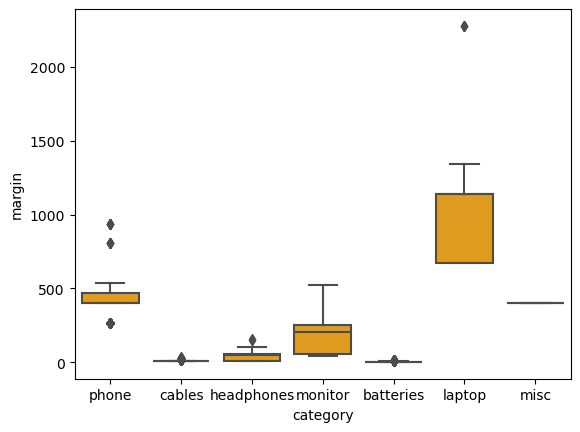

In [15]:
sns.boxplot(x='category', y='margin', data=sales, color='orange')

## Case Scenario: Maximizing Profit Margin

In [16]:
# creating a new dataframe for this scenario
sales1 = sales.copy()
sales1.head()

,product,category,quantity_ordered,price_each,cost_price,turnover,margin,order_year,order_month
0,iphone,phone,1,700.00,231.0000,700.00,469.0000,2019,1
1,lightning_charging_cable,cables,1,14.95,7.4750,14.95,7.4750,2019,1
2,wired_headphones,headphones,2,11.99,5.9950,23.98,11.9900,2019,1
3,27in_fhd_monitor,monitor,1,149.99,97.4935,149.99,52.4965,2019,1
4,wired_headphones,headphones,1,11.99,5.9950,11.99,5.9950,2019,1


In [17]:
# creating a new column to check the total revenue
sales1['pro_mar'] = (sales1['price_each'] - sales1['cost_price'])
total_pro = sales1['pro_mar'].sum()
print("The total sales revenue is: ", f"{total_pro:.2f}")

The total sales revenue is:  21334257.74


In [18]:
# checking that the turnover is the same 
print(f"the total margin is: {sales1['margin'].sum():.2f}")

the total margin is: 21438067.93


In [19]:
# checking if there is a difference between 'pro_mar' and 'margin'
diff = (sales1['margin'] != sales1['pro_mar']).sum()
print(f"There are {diff} 'margin' and 'pro_mar' rows that do not equal each other.")

There are 35204 'margin' and 'pro_mar' rows that do not equal each other.


In [20]:
print("the margin of error is: ", f"{abs(total_pro - sales1['margin'].sum()):.2f}")

the margin of error is:  103810.19


### Importing the Libraries for Regression Analysis

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [22]:
sales1 = sales1.drop(columns='margin')

In [23]:
# making sure thare are no empty cells (double checking)
sales1.isnull().sum()

product             0
category            0
quantity_ordered    0
price_each          0
cost_price          0
turnover            0
order_year          0
order_month         0
pro_mar             0
dtype: int64

In [24]:
# defining features and target variable
X = sales1.drop('pro_mar', axis=1)
y = sales1['pro_mar']

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# use pd.get_dummies to one_hot encode categorical features
X_train_encoded = pd.get_dummies(X_train[['product', 'category']], drop_first=True)
X_test_encoded = pd.get_dummies(X_test[['product', 'category']], drop_first=True)

In [26]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)

In [27]:
# scaling the numerical columns (only the numerical features)
numb_cols = ['quantity_ordered', 'price_each', 'cost_price', 'order_year', 'order_month']
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numb_cols])
X_test_scaled = scaler.transform(X_test[numb_cols])

In [28]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numb_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numb_cols, index=X_test.index)

X_train_final = pd.concat([X_train_encoded, X_train_scaled_df], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_scaled_df], axis=1)

In [29]:
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_train_final, y_train)

LassoCV(cv=5, random_state=0)

In [30]:
y_pred_lasso = lasso.predict(X_test_final)

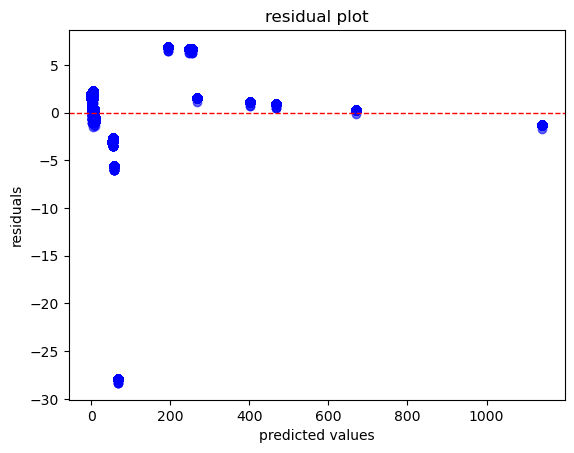

In [31]:
# plotting for visualization
residuals = y_test - y_pred_lasso
plt.scatter(y_pred_lasso, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.title('residual plot')
plt.show();

In [32]:
print(f"Lasso Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"Lasso Regression R^2: {r2_score(y_test, y_pred_lasso)}")

Lasso Regression RMSE: 4.922092566682225
Lasso Regression R^2: 0.999521945406097


In [33]:
# Sample a subset of data
X_train_sample = X_train_scaled[:1000]
y_train_sample = y_train[:1000]

In [34]:
# Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

In [35]:
# Randomized search
random_search = RandomizedSearchCV(
    SVR(kernel='rbf'),
    param_distributions=param_grid,
    n_iter=5,  # Test fewer combinations
    cv=3,
    n_jobs=-1  # Parallelize
)
random_search.fit(X_train_sample, y_train_sample)

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto']})

In [36]:
# Evaluate best model
best_svm = random_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
print(f"SVM Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svm))}")
print(f"SVM Regression R^2: {r2_score(y_test, y_pred_svm)}")

SVM Regression RMSE: 114.86085466887933
SVM Regression R^2: 0.7396713123473979


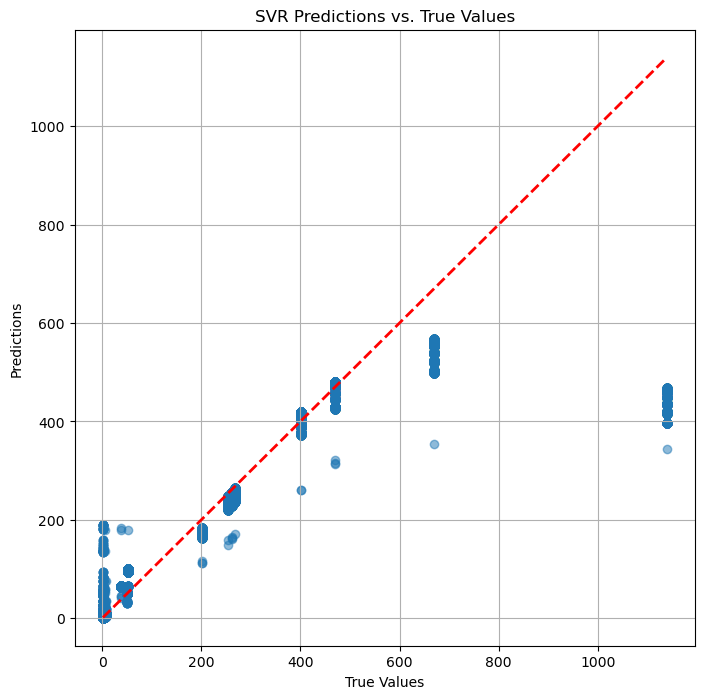

In [37]:
# plotting output

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_svm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("SVR Predictions vs. True Values")
plt.grid()
plt.show()